# Experimentation with drawing a graph

equal


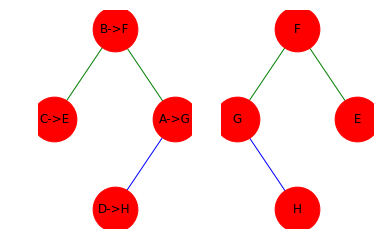

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import string

def test_degree(G1, G2):
    G1_degrees = sorted([G1.degree(n) for n in G1.nodes()])
    G2_degrees = sorted([G2.degree(n) for n in G2.nodes()])
    #print(G1_degrees)
    #print(G2_degrees)
    return G1_degrees == G2_degrees

def draw(G):
    edge_colors = ['blue' if w == 1 else 'green' for w in (nx.get_edge_attributes(G, 'weight').values())]
    #nx.draw_shell(G, with_labels=True, edge_color=edge_colors, node_size=2000)
    nx.draw_circular(G, with_labels=True, edge_color=edge_colors, node_size=2000)
    
# Get all nodes of degree degree
def degree_nodes(G, degree):
    return list(filter(lambda n: G.degree(n) == degree, G.nodes()))

# Pre-condition: |G1| == |G2|
# Run test_degree() before calling this function
# G1 will take on the values of G2, so G2 will not be modified
def graphs_equal_impl(G1, G2, G1_unmapped, G2_unmapped):
    if len(G1_unmapped) == 0:
        return True
    n1 = G1_unmapped.pop()
    deg = G1.degree(n1)
    G2_nodes = degree_nodes(G2, deg)
    # For each unvisited node that has the same degree as n1,
    # check to see if it is compatible with n1 by comparing 
    # edges with visited (mapped) nodes.
    for n2 in set(G2_nodes).intersection(G2_unmapped):
        mapped = n2
        G1.nodes[n1]['mapped'] = mapped
        consistent = True
        # n1 is consistent with n2 if all mapped neighbors to n1
        # have edges in G2 and those edges have identical labels.
        for nbr in G1.adj[n1]:
            nmapped = G1.nodes[nbr]['mapped']
            if nmapped != '' and (not G2.has_edge(mapped,nmapped)
                                  or G2[mapped][nmapped]['weight'] != G1[n1][nbr]['weight']):
                consistent = False
        if consistent:
            G1_unmapped_copy = G1_unmapped.copy()
            G2_unmapped_copy = G2_unmapped.copy()
            G2_unmapped_copy.remove(n2)
            if graphs_equal_impl(G1, G2, G1_unmapped_copy, G2_unmapped_copy):
                return True
        G1.nodes[n1]['mapped'] = ''
    return False

def graphs_equal(G1, G2):
    if not test_degree(G1, G2):
        return False
    return graphs_equal_impl(G1, G2, set(G1.nodes()), set(G2.nodes))

G1 = nx.Graph()
G2 = nx.Graph()

labels = list(string.ascii_uppercase)
G1.add_nodes_from(labels[0:4])
G2.add_nodes_from(labels[4:8])

for n in G1.nodes():
    G1.nodes()[n]['mapped'] = ''
for n in G2.nodes():
    G2.nodes()[n]['mapped]'] = ''

G1.add_edge('A', 'B', weight=-1)
G1.add_edge('B', 'C', weight=-1)
G1.add_edge('A', 'D', weight=1)

G2.add_edge('E', 'F', weight=-1)
G2.add_edge('F', 'G', weight=-1)
G2.add_edge('H', 'G', weight=1)
#G2.add_edge(1, 0, weight=1)

if graphs_equal(G1, G2):
    print('equal')
    new_label_map = dict((v,str(v) + '->' + str(k)) for v,k in nx.get_node_attributes(G1, 'mapped').items())
    #G1 = nx.relabel_nodes(G1, nx.get_node_attributes(G1, 'mapped'))
    G1 = nx.relabel_nodes(G1, new_label_map)
else:
    print('not equal')


plt.subplot(121)
draw(G1)
plt.subplot(122)
draw(G2)


# LnFinderWithCoefficients

This code is out of date

In [7]:
# import math
# from sympy import *
# from copy import deepcopy
# import numpy as np
# import scipy

# #------------------------------------------------------------------------------
# # Class Filter
# #------------------------------------------------------------------------------

# # Utility class
# class Filter:
#     def __init__(self, d=None, dimension=None, extension=None, type=None):
#         self.d = d
#         self.dimension = dimension
#         self.extension = extension
#         self.type = type

# #------------------------------------------------------------------------------
# # Class BracketResult
# #------------------------------------------------------------------------------

# # Object for holding the result of a bracket operation.
# # Constructor parameters:
# #   1. k - the X index of the result.
# #   2. alpha - the alpha value for the result (may be a number or Sympy symbol).
# # Example: Given the bracket [X1, X2] = X3, the bracket result object would be:
# #   k = 3, alpha = 1
# class BracketResult:
#     def __init__(self, k, alpha):
#         self.index = k
#         self.alpha = alpha

#     # Overloaded multiplication operator:
#     # Makes a copy of the algebra, multiplies the alpha value, then returns the copy.
#     def __mul__(self, other):
#         bracketcopy = deepcopy(self)
#         bracketcopy.alpha *= other
#         return bracketcopy


# #------------------------------------------------------------------------------
# # Class LieAlgebra
# #------------------------------------------------------------------------------

# # A lie algebra object.
# # Constructor parameters:
# #   1. dimension - the dimension of the algebra.
# #   2. name (optional) - the named algebra to construct.
# # Contains:
# #   1. A dictionary of brackets (indexed by tuple).
# #   2. A dimension
# #   3. A d-value
# #   4. An extension count
# #   5. An array of Jacobi triples to test.
# #   6. A dictionary of Jacobi test results (indexed by triple).
# class LieAlgebra:
#     def __init__(self, dimension):#, name=None):
#         self.brackets = {}
#         self.dimension = dimension
#         self.d = 0
#         self.extension = 0
#         self.JacobiToTest = []
#         self.JacobiTestResults = {}
#         self.JacobiTestResults2 = {}
#         self.type = None


#     # f = filter
#     def matches(self, f):
#         if f == None:
#             return True
#         return ((f.d == None or self.d in f.d) and
#                 (f.dimension == None or self.dimension in f.dimension) and
#                 (f.extension == None or self.extension in f.extension) and
#                 self.type == f.type)

#     # Accepts i, j, and k as indices and then adds a new bracket to the lie
#     # algebra. (Alpha is optional and defaults to 1)
#     def add_bracket(self, i, j, k, alpha=1):
#         res = BracketResult(k, alpha)
#         self.brackets[i, j] = res

#     # Accepts i, j, and k as eigenvalues, converts them to indices, and then
#     # uses the indices to add a bracket.
#     def add_eigenvalue_bracket(self, i, j, k, d, n, extType):
#         i = self.convert_eigenvalue_to_index(i, d, n, extType)
#         j = self.convert_eigenvalue_to_index(j, d, n, extType)
#         k = self.convert_eigenvalue_to_index(k, d, n, extType)

#         # This format ensures correct Latex printing:
#         alphatext = "alpha_{},{}^{}".format(i, j, k)
#         self.add_bracket(i, j, k, Symbol(alphatext))

#     # Performs the bracket operation [Xi, Xj]
#     def bracket(self, i, j):
#         newAlpha = 1

#         if type(i) == BracketResult:
#             newAlpha *= i.alpha
#             i = i.index
#         if type(j) == BracketResult:
#             newAlpha *= j.alpha
#             j = j.index

#         if (i, j) in self.brackets:
#             return self.brackets[(i, j)] * newAlpha
#         # If [Xi, Xj] is not found, check for [Xj, Xi] (and multiply the
#         # resulting alpha by -1 if found).
#         elif (j, i) in self.brackets:
#             return self.brackets[(j, i)] * (newAlpha * -1)
#         else:
#             return 0

#     def convert_index_to_eigenvalue(self, index, la_type, d=0):
#         if la_type == 'A':
#             if d == 0:
#                 d = self.d
#             return index + d - 2
#         return index + 2 * d - 3

#     def convert_eigenvalue_to_index(self, eigenval, d, n, extType):
#         if d == 0:
#             # if d is zero, then set it to self.d
#             raise "d == 0"
#         if eigenval == 1:
#             raise "eigenval == 1"
#         if extType == 'A':
#             return eigenval - d + 2
#         else:
#             if eigenval < n + 2 * d - 3:
#                 return eigenval - d + 2
#             return n+1
        
#     def print_brackets(self):
#         for key1, key2 in sorted(self.brackets):
#             res = self.brackets[(key1, key2)]

#             # Doubling the bracket acts as an escape character
#             # (i.e. '{{' becomes '{' in the final output),
#             # and we need the keys to be inside of brackets
#             # before being converted to Latex
#             # so that multiple digits stick together inside of a subscript.
#             bracketFormat = latex("[X_{{{}}},X_{{{}}}]".format(key1, key2))
#             resultFormat = latex(res.alpha * Symbol("X" + str(res.index)))

#             print("$${} = {}$$".format(bracketFormat, resultFormat))


#         # Testing out groebner bases to solve Jacobi equations
#     def test_jacobi_groebner(self):
#         # print before substitution
#         eqns = [self.JacobiTestResults[triple] for triple in self.JacobiToTest]

#         syms = []
#         for eqn in eqns:
#             syms.extend(eqn.free_symbols)
#         syms = set(syms)
#         #print(syms)
#         n = len(syms)
#         new_syms = ['x_{{{}}}'.format(i) for i in range(n)]
#         #print(new_syms)
#         old2new = list(zip(syms, new_syms))
#         #print("Symbol map: {}".format(['$({}, {})$'.format(latex(o), latex(n)) for o,n in old2new]))
#         for o,n in old2new:
#             print('$${} \\rightarrow {}$$'.format(latex(o), latex(n)))

#         #result = groebner(eqns)
#         #for r in result:
#             #print("$${}$$".format(latex(r)))
#         #    print("$${}$$".format(r.free_symbols))

#         for triple in self.JacobiToTest:
#             eqn = self.JacobiTestResults[triple]
#             print("Jacobi identity for {}: $$\\displaystyle {}$$ $${}$$".format(triple, latex(eqn), latex(eqn.subs(old2new))))

#         print()
#         # do substitution
#         #subs = [('alpha_4,7^12', 'x1'),
#         #        ('alpha_2,5^8', 'x2'),
#         #    ]
#         eqns = [eqn.subs(old2new) for eqn in eqns]

#         #print("In Groebner basis\\\\")
#         #for eqn in eqns:
#         #    print("$${}$$".format(latex(eqn)))

#         print("Equations in Groebner basis")
#         geqns = groebner(eqns)
#         for geqn in geqns:
#             print("$${}$$".format(latex(geqn)))
#             #print("$${}$$".format(r))

#     def create_Y(self):
#         numTriples = len(self.brackets)
#         I = np.identity(self.dimension)
#         Y = np.zeros((numTriples, self.dimension))
#         i = 0
#         for key1, key2 in sorted(self.brackets):
#             # key1 and key2 are indices
#             key3 = self.brackets[(key1, key2)].index
#             #print("{}, {}, {}, {}, {}".format(key1, key2, key3, self.d, self.dimension))
#             Y[i] = I[key1-1] + I[key2-1] - I[key3-1]
#             i = i + 1
#         #print(Y)
#         rank = np.linalg.matrix_rank(Y)
#         corank = numTriples - rank
#         #print('rank = {}, corank = {}'.format(rank, corank))
#         return Y
#         """

#             # Doubling the bracket acts as an escape character
#             # (i.e. '{{' becomes '{' in the final output),
#             # and we need the keys to be inside of brackets
#             # before being converted to Latex
#             # so that multiple digits stick together inside of a subscript.
#             bracketFormat = latex("[X_{{{}}},X_{{{}}}]".format(key1, key2))
#             resultFormat = latex(res.alpha * Symbol("X" + str(res.index)))

#             print("$${} = {}$$".format(bracketFormat, resultFormat))
#             """
#     def print_jacobi_to_test(self):
#         for triple in self.JacobiToTest:
#             res = self.JacobiTestResults[triple]
#             #print("Jacobi identity for \\{{e_{}, e_{}, e_{}\\}}: $\\displaystyle {}$\\\\".format(triple, latex(res)))
#             print("\\strut \\qquad Jacobi identity for $\\{{e_{}, e_{}, e_{}\\}}$: $\\displaystyle {}$\\\\".format(triple[0], triple[1], triple[2], latex(res)))

#     def add_jacobi_to_test(self, triple):
#         self.JacobiToTest.append(triple)


# #------------------------------------------------------------------------------
# # Functions
# #------------------------------------------------------------------------------

# def create_L(dimension):
#     LA = LieAlgebra(dimension)
#     LA.d = 2
#     LA.type = 'A'
#     for j in range(2, dimension):
#         LA.add_bracket(1, j, j + 1)
#     return LA

# # Test an individual triple to see if it is trivial.
# def test_jacobi(LA, i, j, k):
#     r1 = LA.bracket(i, LA.bracket(j, k))
#     r2 = LA.bracket(j, LA.bracket(k, i))
#     r3 = LA.bracket(k, LA.bracket(i, j))
#     if r1 != 0 or r2 != 0 or r3 != 0:
#         return Eq(GetEqTerm(r1) + GetEqTerm(r2) + GetEqTerm(r3))
#     else:
#         return False

# # Find all of the non-trivial triples that need to be tested.
# def test_all_jacobi(LA):
#     if True:#LA.type == "A":
#         JacobiTestsFromY(LA)
#     else:
#         d = LA.d
#         n = LA.dimension
#         la_type = LA.type
#         #if d < (n-4)/2: Not applicable to type B
#         if True:
#             for j in range(2, n - 2):
#                 for k in range(j + 1, n - 1):
#                     ej = LA.convert_index_to_eigenvalue(j, la_type)
#                     ek = LA.convert_index_to_eigenvalue(k, la_type)
#                     emax = LA.convert_index_to_eigenvalue(n, la_type)
#                     if ej + ek + 1 == emax:
#                         resultset = test_jacobi(LA, 1, j, k)
#                         if resultset is not False:
#                             LA.JacobiToTest.append((1, j, k))
#                             LA.JacobiTestResults[(1, j, k)] = resultset
#         else:
#             msg = "test\_all\_jacobi condition not met: d={} n={}. Case ignored.".format(d, n)
#             print(msg)

# def JacobiTestsFromY(LA):
#     Y = LA.create_Y()
#     U = np.dot(Y, Y.transpose())
#     negOnes = np.where(U == -1)
#     allIndices = []
#     for i in range(len(negOnes[0])):
#         idx0 = negOnes[0][i]
#         idx1 = negOnes[1][i]
#         sum = np.add(Y[idx0], Y[idx1])
#         indices = np.where(sum == 1)
#         isIn = False
#         for i in allIndices:
#             isIn = isIn or np.array_equal(indices, i)
#         if not isIn:
#             allIndices.append(indices)
#     LA.JacobiToTest = []
#     for indices in allIndices:
#         i = indices[0][0]+1
#         j = indices[0][1]+1
#         k = indices[0][2]+1
#         resultset = test_jacobi(LA, i, j, k)
#         resultset2 = test_jacobi(LA, i, j, k)
#         if resultset is not False:
#             LA.JacobiToTest.append((i, j, k))
#             LA.JacobiTestResults[(i, j, k)] = resultset
#             LA.JacobiTestResults2[(i, j, k)] = resultset2

# # Convert a jacobi test result into an equation term.
# def GetEqTerm(res):
#     if type(res) == BracketResult:
#         return res.alpha
#                # * Symbol("X" + str(res.index))
#     else:
#         return 0


# # Check if a 'd' value is valid for a given 'n'.
# def IsValidD(n, d):
#     #print("***** valid " + str(n) + " " + str(d))
#     if n - d % 2 == 0:
#         #return (n - 2) > d
#         valid = (n - 2) > d
#     else:
#         #return (n - 1) > d
#         valid = (n - 1) > d
#     #print("isValidD returning {}".format(valid))
#     return valid


# # Accepts a lie algebra and a d value, increments the dimension, and then
# # adds the new brackets.
# def GenerateExtendedLA(LA, d, extType):
#     n = LA.dimension
#     n2 = n + 1  # The dimension of the new Lie Algebras

#     LastValue = n + d - 1  # The last eigenvalue
#     if extType == 'B':
#         LastValue = n2 + 2*d - 3

#     NewLieAlg = deepcopy(LA)
#     NewLieAlg.extension += 1
#     NewLieAlg.dimension += 1
#     NewLieAlg.d = d
#     NewLieAlg.type = extType
#     if extType == 'A':
#         NewLieAlg.add_bracket(1, n, n2)
#     else:
#         NewLieAlg.add_bracket(2, n, n2)

#     startValue = d
#     #if extType == 'B':
#     #    startValue = d+1

#     #print("d={}, n={}, n2={}, type={}, startValue={}, LastValue={}".format(
#     #          d, n, n2, extType, startValue, LastValue))
#     # Odd case
#     if (n - d) % 2 != 0:
#         CenterValue = int(LastValue / 2)
#         #print("Odd: CenterValue={}".format(CenterValue))

#         for i in range(startValue, CenterValue + 1):
#             j = LastValue - i
#             if i != j:
#                 NewLieAlg.add_eigenvalue_bracket(i, j, LastValue, d, n, extType)

#     # Even case
#     else:
#         CenterValue = int((LastValue - 1) / 2.0)
#         #print("Even: CenterValue={}".format(CenterValue))

#         for i in range(startValue, CenterValue + 1):
#             j = LastValue - i
#             NewLieAlg.add_eigenvalue_bracket(i, j, LastValue, d, n, extType)

#     return NewLieAlg


# # Accepts a lie algebra and finds the TypeB that can be made by extending it.
# def FindNextDimensionTypeB(LA):
#     n = LA.dimension
#     d = LA.d
#     NewLieAlg = deepcopy(LA)
#     NewLieAlg.dimension += 1
#     NewLieAlg.type = 'B'

#     LastValue = 2 * d + n - 2
#     CenterValue = math.floor(LastValue / 2)
#     RangeEnd = CenterValue + 1 if ((n - d) % 2 != 0) else CenterValue

#     for i in range(d, RangeEnd):
#         j = LastValue - i
#         NewLieAlg.add_eigenvalue_bracket(i, j, LastValue, d, n, extType)

#     return NewLieAlg


# def PrintFoundLieAlgebras(LAFound, filter=None):
#     # If only one LA was provided there is no need to loop.
#     if type(LAFound) == LieAlgebra:
#         PrintExtendedLA(LAFound, filter)
#         #Y = LAFound.create_Y()
#         #print("Y = {}".format(Y))
#     else:
#         for LA in LAFound:
#             PrintExtendedLA(LA, filter)
#             #LA.create_Y()

# def null(A, eps=1e-15):
#     u, s, vh = np.linalg.svd(A)
#     null_mask = (s <= eps)
#     null_space = scipy.compress(null_mask, vh, axis=0)
#     return np.transpose(null_space)

# def PrintExtendedLA(LA, filter=None):
#     if filter == None or (LA.matches(filter)):
#         #print("Testing Jacobi: {}, {}".format(LA.d, LA.dimension));
#         test_all_jacobi(LA)
#         #print("Printing Jacobi: {}, {}".format(LA.d, LA.dimension));
#         sectionFormat = latex("$m_{{{}}}({}, {})$".format(str(LA.extension) + LA.type, LA.d, LA.dimension))
#         print("\section{{{}}}".format(sectionFormat))
#         LA.print_brackets()
#         print("\nNon-trivial Jacobi Tests:\n")
#         #test_all_jacobi(LA)
#         """
#         Y = LA.create_Y()
#         print("Y = \n{}".format(Y))
#         nullY = null(Y)
#         print("null(Y) = \n{}".format(nullY))
#         U = np.dot(Y, Y.transpose())
#         print("U = \n{}".format(U))
#         m = Y.shape[0]
#         print("Rank = {}, m = {}".format(np.linalg.matrix_rank(U), m))
#         print("Solving Uv = [1 1 ... 1]'")
#         ones = np.ones((m,1))
#         #print("Ones = {}".format(ones))
#         v = np.linalg.solve(U, ones)
#         print("v = \n{}".format(v))
#         """

#         LA.print_jacobi_to_test()
#         #print("\n")

#         if True:#LA.type == 'A':
#             try:
#                 LA.test_jacobi_groebner()
#             except:
#                 print("****** FAILED JACOBI GROEBNER ******")
            

# # Extends a lie algebra, checking for all possible d values.
# # This function is iterative (no recursion).
# def FirstExtendLieAlgebra(LA):
#     NewLieList = []
#     if LA.type == 'B':
#         return NewLieList

#     if LA.dimension % 2 == 0:
#         d = 2
#     else:
#         d = 3
#     while IsValidD(LA.dimension, d):
#         newLA = GenerateExtendedLA(LA, d, extType='A')
#         NewLieList.append(newLA)
#         # Generate extended type B LA from newLA
#         newLA_B = GenerateExtendedLA(newLA, newLA.d, extType='B')
#         NewLieList.append(newLA_B)
#         d += 2
#     return NewLieList

# # Extends a lie algebra using the d value of LA.
# def ExtendLieAlgebra(LA):
#     NewLieList = []
#     if LA.type == 'B':
#         return NewLieList

#     d = LA.d # start d value
#     newLA = GenerateExtendedLA(LA, d, extType='A')
#     NewLieList.append(newLA)
#     # Generate extended type B LA from newLA
#     newLA_B = GenerateExtendedLA(newLA, newLA.d, extType='B')
#     NewLieList.append(newLA_B)
#     return NewLieList

# def RecursiveExtension(LA, depth):
#     ret = []
#     if depth > 0:
#         LAFound = ExtendLieAlgebra(LA)
#         ret.extend(LAFound)
#         for NewLA in LAFound:
#             ret.extend(RecursiveExtension(NewLA, depth - 1))
#     return ret

# def ExtendL(LA, depth):
#     ret = []
#     LAFound = FirstExtendLieAlgebra(LA)
#     ret.extend(LAFound)
#     for NewLA in LAFound:
#         ret.extend(RecursiveExtension(NewLA, depth - 1))

#     return ret
    


# Main

I believe this code is out of date

In [1]:
# from sympy import *

# from LnFinderWithCoefficients import LieAlgebra
# from LnFinderWithCoefficients import RecursiveExtension
# from LnFinderWithCoefficients import ExtendL
# from LnFinderWithCoefficients import *

# #print("***********************************************************************")
# #print("***********************************************************************")
# #print("***********************************************************************")

# """
# L4 = LieAlgebra(name="L", dimension=4)
# L5 = LieAlgebra(name="L", dimension=5)
# L6 = LieAlgebra(name="L", dimension=6)
# L7 = LieAlgebra(name="L", dimension=7)
# L8 = LieAlgebra(name="L", dimension=8)
# L9 = LieAlgebra(name="L", dimension=9)
# L10 = LieAlgebra(name="L", dimension=10)
# L11 = LieAlgebra(name="L", dimension=11)
# L12 = LieAlgebra(name="L", dimension=12)
# L13 = LieAlgebra(name="L", dimension=13)
# L14 = LieAlgebra(name="L", dimension=14)
# L15 = LieAlgebra(name="L", dimension=15)
# """
# L4 = create_L(4)
# L5 = create_L(5)
# L6 = create_L(6)
# L7 = create_L(7)
# L8 = create_L(8)
# L9 = create_L(9)
# L10 = create_L(10)
# L11 = create_L(11)
# L12 = create_L(12)
# L13 = create_L(13)
# L14 = create_L(14)
# L15 = create_L(15)

# Ls = [ L4, L5, L6, L7, L8, L9, L10, L11, L12, L13, L14, L15 ]

# found = []
# for L in Ls:
#     #ExtendL(LA=L, depth=10, output=True,
#     #        output_filter=Filter([2,4], [10], [4,5,6], 'A'))

#     # Document for Beau and Sara
#     #found.extend(ExtendL(LA=L, depth=11, output=False,
#     #                     output_filter=None))

#     found.extend(ExtendL(LA=L, depth=11))

# print('\\documentclass{article}\n\\setlength{\\parindent}{0cm} ' +
#       '% Default is 15pt.\n\\begin{document}\n')

# # sort algebras in order of dimension and output
# found.sort(key=lambda la: (la.dimension, la.d, la.extension))

# # filter for beau and sara
# filter = Filter(dimension=[6, 8, 10, 12], type='B')
# PrintFoundLieAlgebras(found, filter)

# #filter = Filter(dimension=[6, 7, 8, 9], type='A')
# #PrintFoundLieAlgebras(found, filter)

# print('\n\\end{document}\n')
